In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats
import seaborn as sns

In [13]:
df=pd.read_csv("adult.csv",na_values='?',skipinitialspace=True)

Income Classification Model
Introduction
The income dataset was extracted from 1994 U.S. Census database.

The importance of census statistics
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

Objective of the porject
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

Features Description
Categorical Attributes
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country

Continuous Attributes
age: continuous. Age of an individual

fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous. Individual's working hour per week

In [14]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
df.shape

(48842, 15)

In [17]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
data=df.dropna()

In [21]:
data.shape

(45222, 15)

In [22]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


#  Summary statistics for numeric attribute

In [23]:
data_num = data.drop(["educational-num","income"], axis=1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000



For Age :

The mean value is 38 i.e. on an average the value of age attribute is 38.
Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.
The value of Age attribute varies from 17 to 90.
The 1st quartile is 28 i.e. 25% of the observations lies below 28.
3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.
For fnlwgt :

This is the sampling weight corresponding to the observations.
finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.
For capital-gain :

For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).
For capital-loss :

This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).
For hours-per-week :

This attribute means number of working hours spend by an individual in a week.
In this data the hours per week atrribute varies within the range of 1 to 99.
75 percentage of the people spend 45 or less working hours per week.
The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
Observations are very sparse below 25th percentile and after 75th percentile.
Using quartiles we can say that data is approximately symmetric.
Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong. 

In [26]:
data_num.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


Native-country has maximum number of unique categories i.e. 41 categories.
But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).
Occupation has more or less uniform distribution of categories as comparerd to the other attributes.
Race is also biased to the white race category(41762) with 85.5%.
The top category in workclass is Private having frequency(36705) and percentage(75.5%).

5. EDA
5.1.Univariate analysis
5.1.1 Age
i. Distribution# 

# EDA
1.Univariate analysis
1.1 Age i. Distribution#

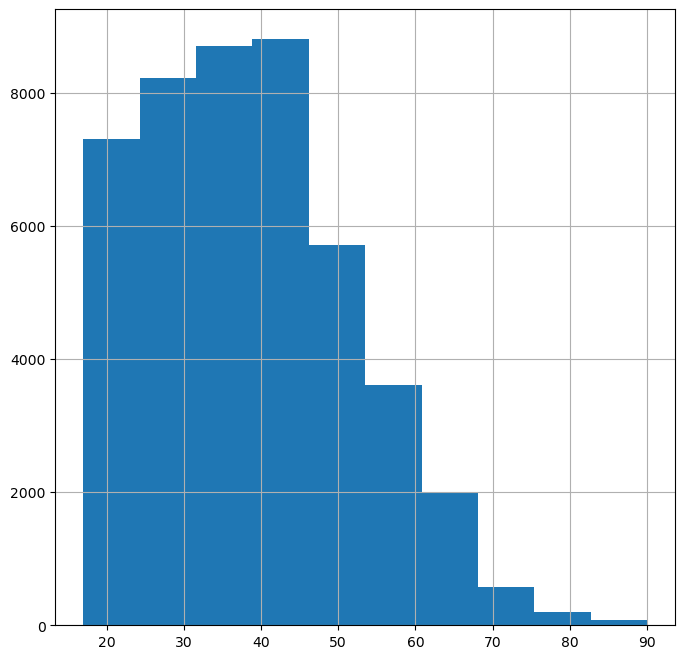

In [29]:
data['age'].hist(figsize=(8,8))
plt.show()

ii. Description about the distribution# 

The above histogram shows that :

"age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

# Hours per week

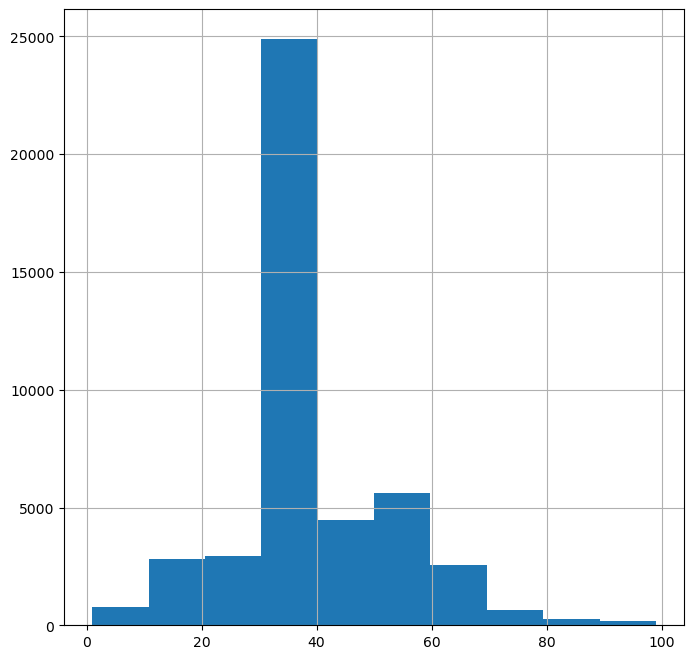

In [30]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

# Description about the distribution

In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are roughly 27,000 people.
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
75 percentage of the people spend 45 or less working hours per week.

# fnlwgt

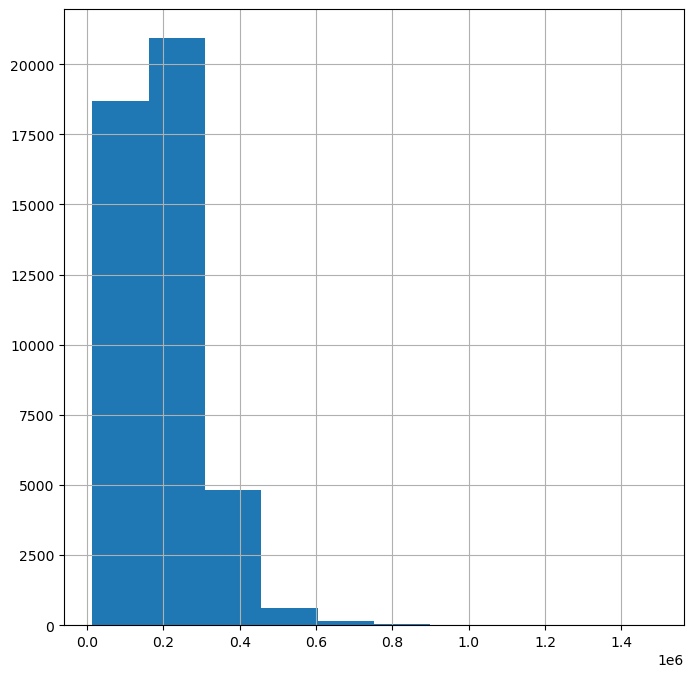

In [32]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

# . Description about distribution

The above histogram shows that :

This is the sampling weight corresponding to the observations.
The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

# capital-gain

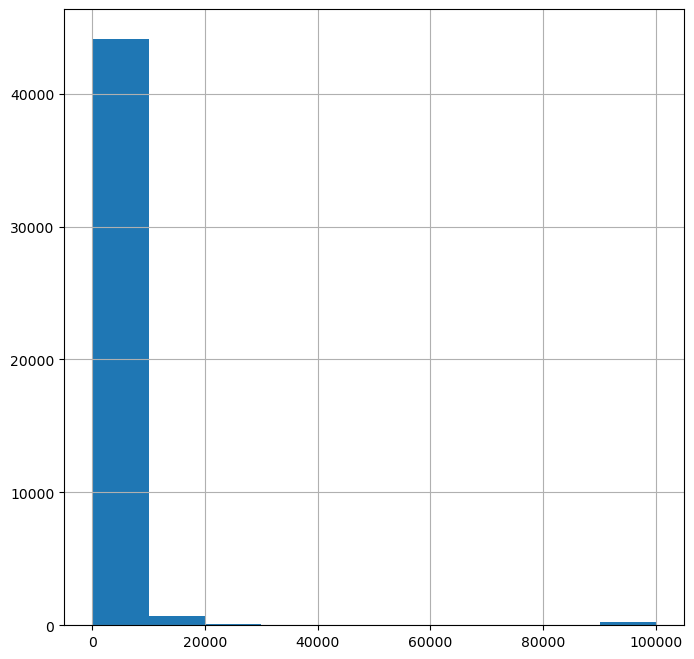

In [33]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

# Description about distribution

This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
capital-gain is concentrated on the one particular value and other are spread with large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

# capital-loss

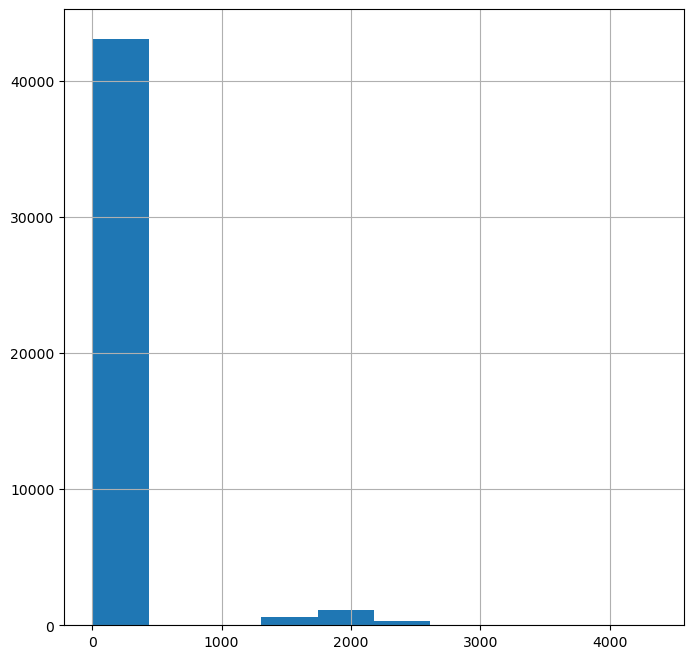

In [34]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

#  Description about distribution

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

# Relation between capital gain and capital loss

# Let's explore more about capital loss and capital gain.

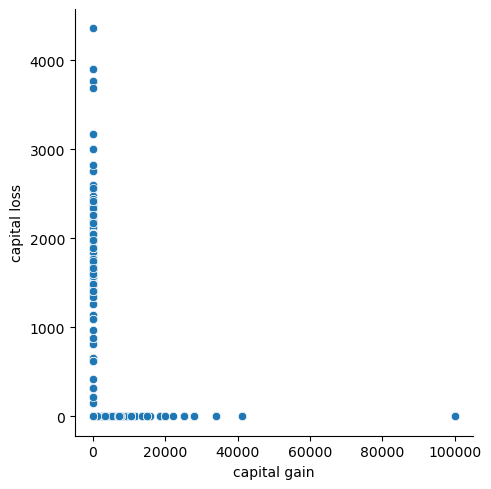

In [37]:
sns.relplot('capital-gain','capital-loss', data=data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero
If capital.gain is zero there is possibility of capital loss being high or above zero.
If capital loss is zero there is possibility of capital.gain being high or above zero.

# With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])

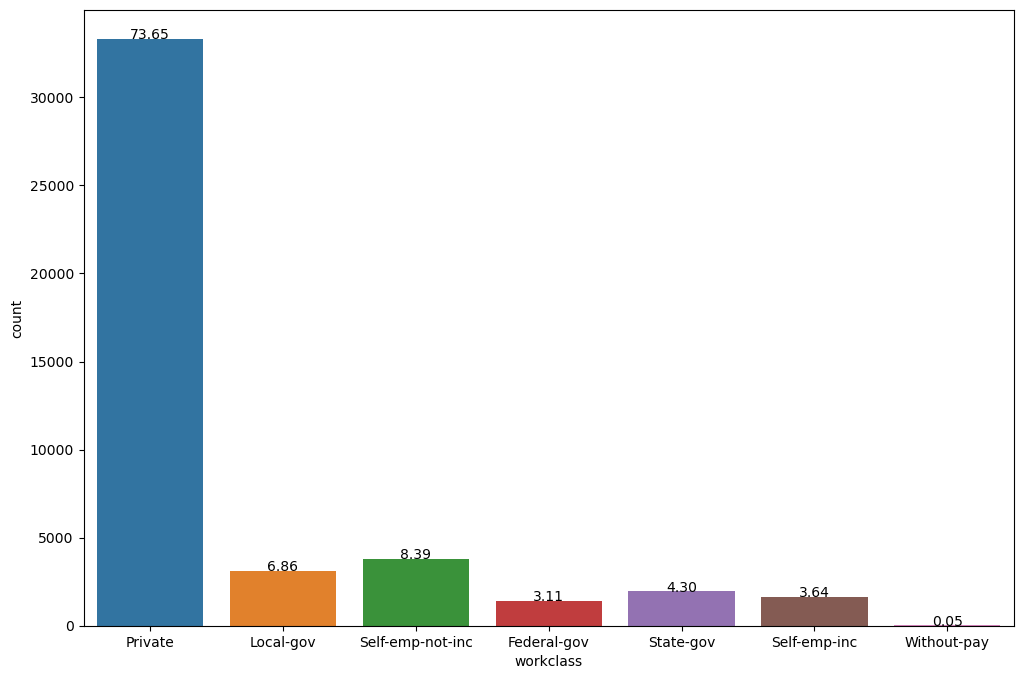

In [40]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution

Summary distribution shows that:

There are 7 unique categories present in the worclass attribute.
Most of them belong to the private workclass(36705) i.e. 75.15%.
without-pay and never-worked has minimum count in workclass attribute(less than 1%).
There is huge imbalance in the categories of workclass attribute.

# Education

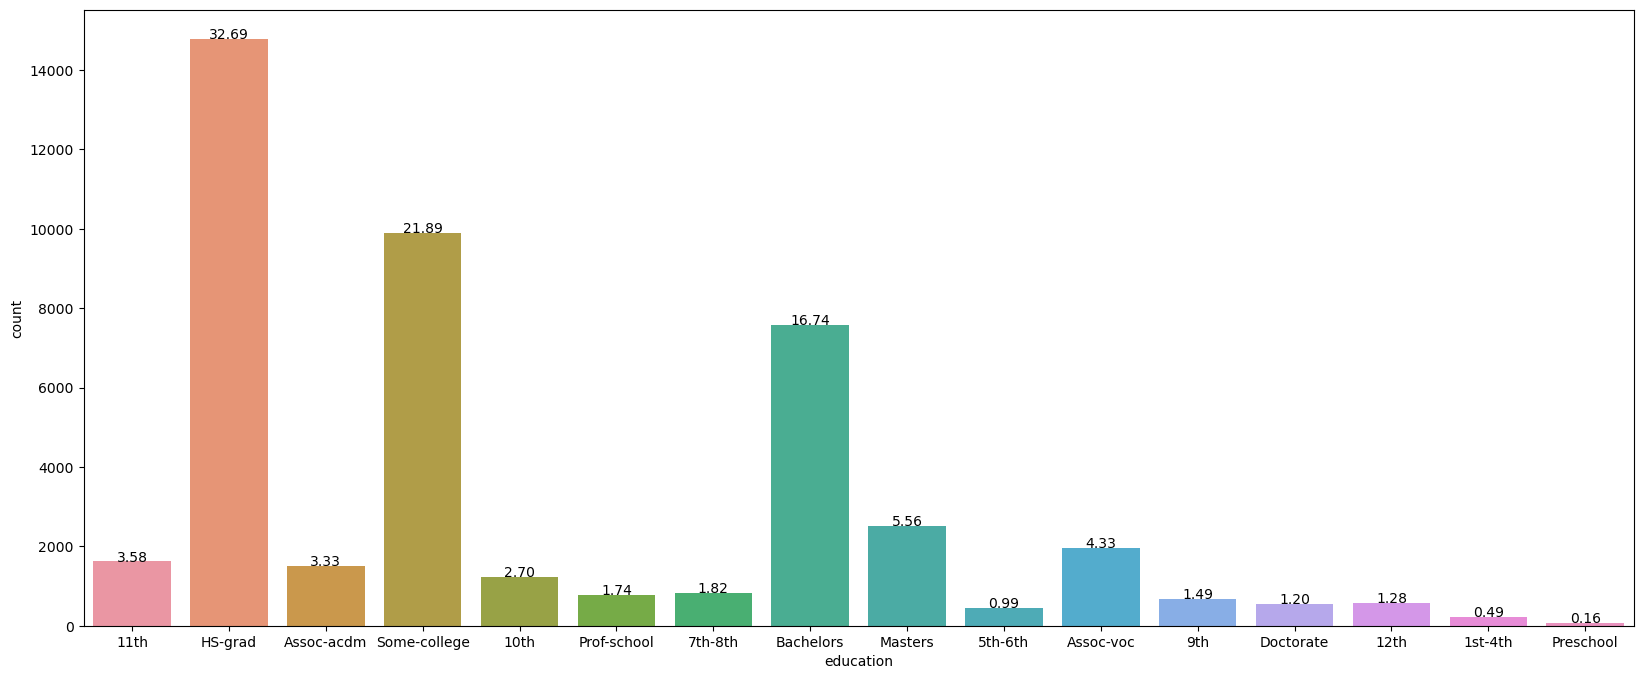

In [41]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Description about distribution

There are 16 unique categories present in the education attribute.
Hs-grad has 32.32% of all the education attribute.
HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
Pre-school has minimum samples i.e. 83.

#  marital-status

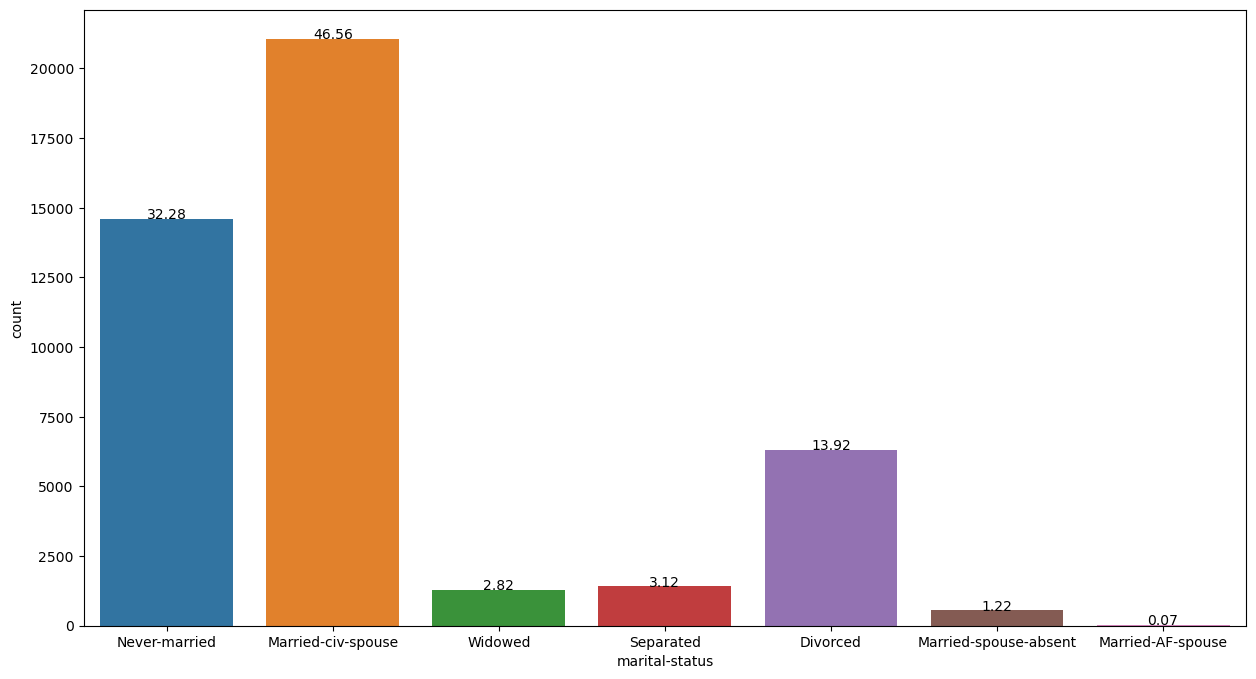

In [42]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# . Description about distribution

This marital-status attribute has 7 unique categories.
Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
Married-civ-spouse has maximum number of samples.
Married-AF-spouse has minimum number of obs.

# Occupation

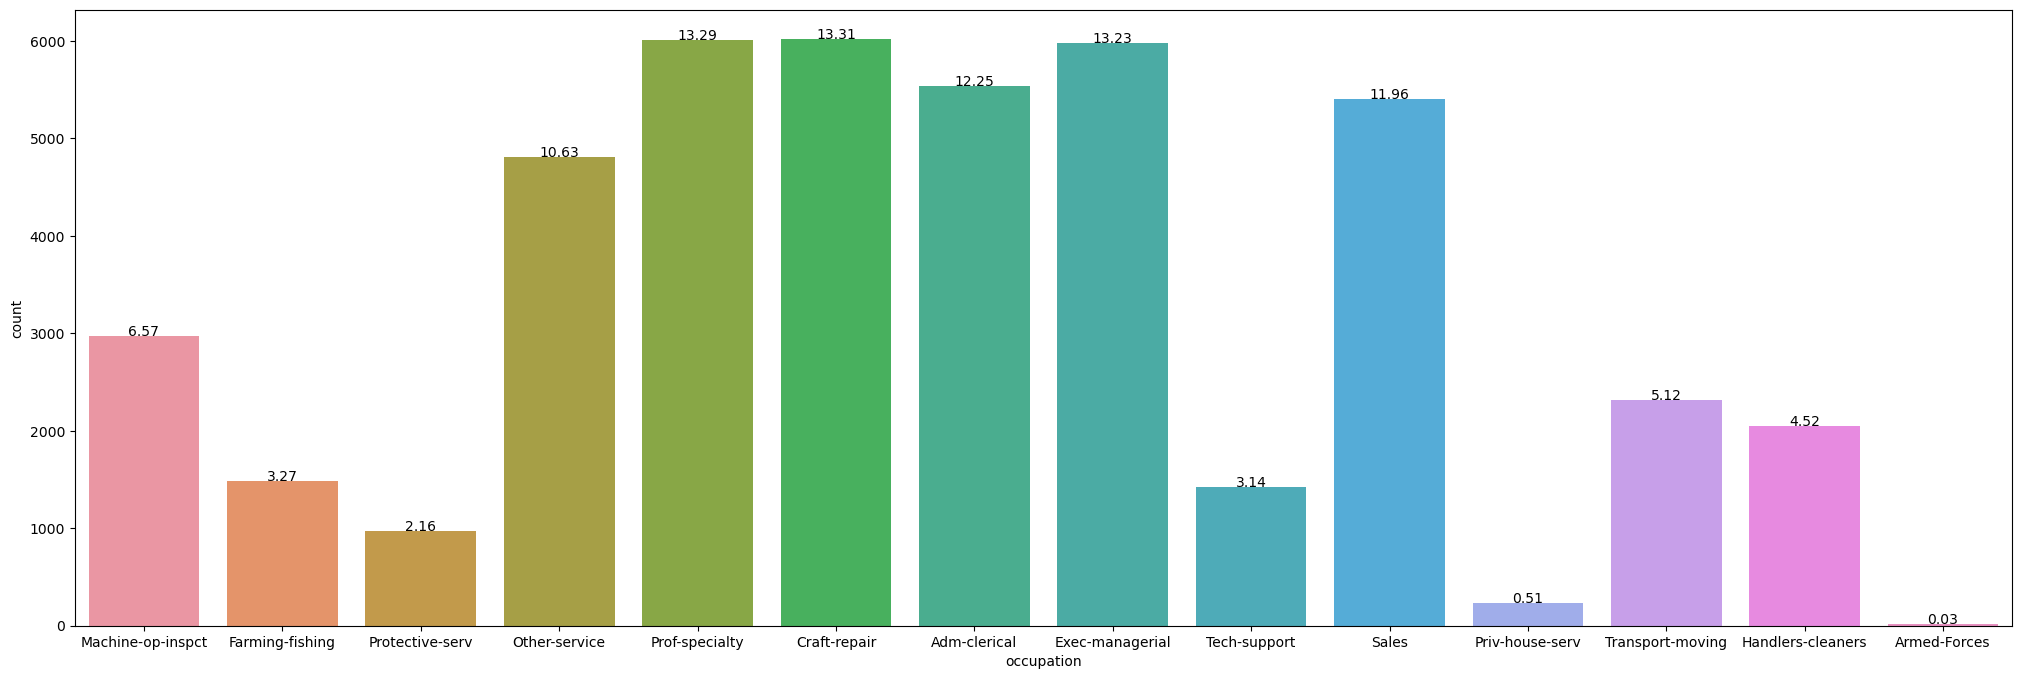

In [43]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#  Description about distribution

There are 14 unique categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces * has minimum samples in the *occupation** attribute.

# Distribution

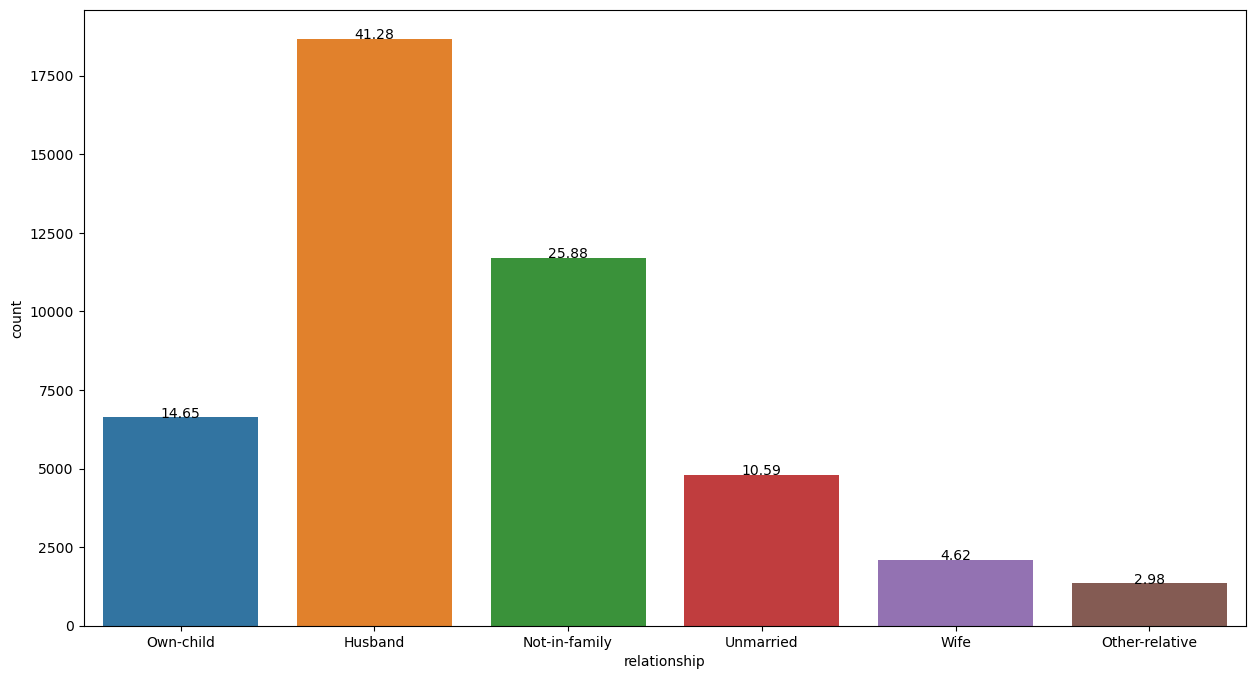

In [44]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#  Description about distribution

There are 6 unique categories in the relationship attribute.
Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

# Race

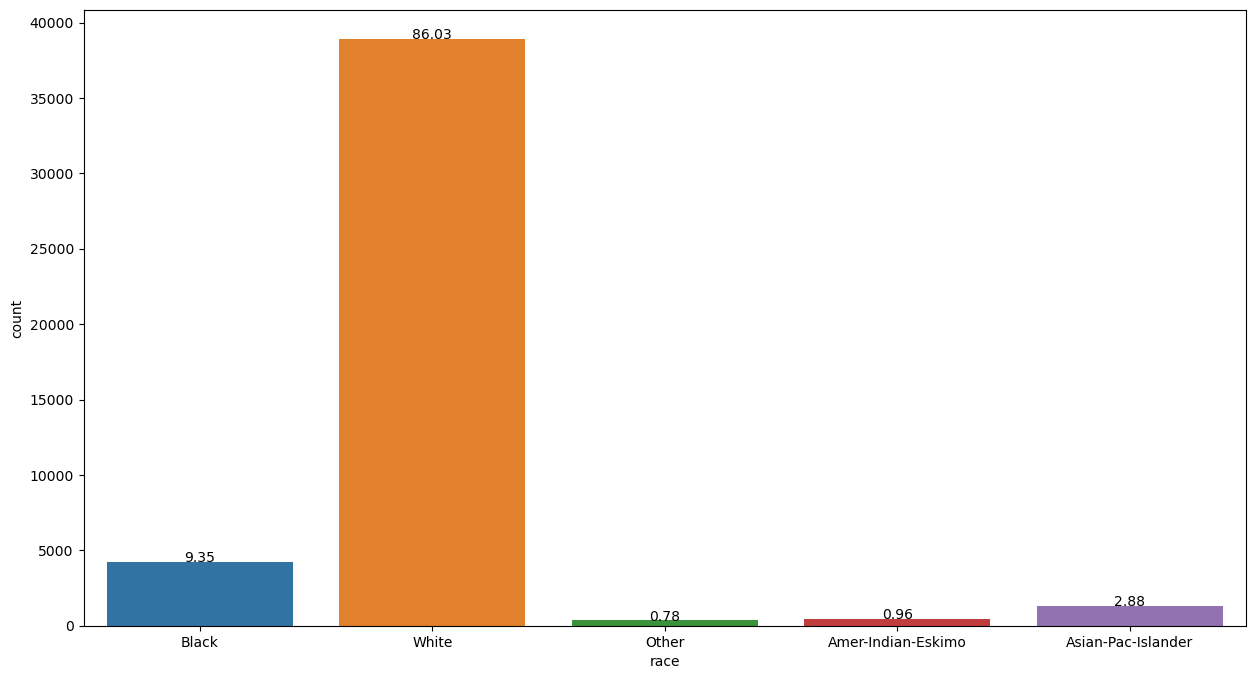

In [45]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Description about distribution

There are 5 unique categories in the race attribute.
Most of them are "white" which is roughly 85.50%.
This dataset is totally bias toward the "white" race.
Second major race in the dataset is the "black" with just 9.59%.

# Gender

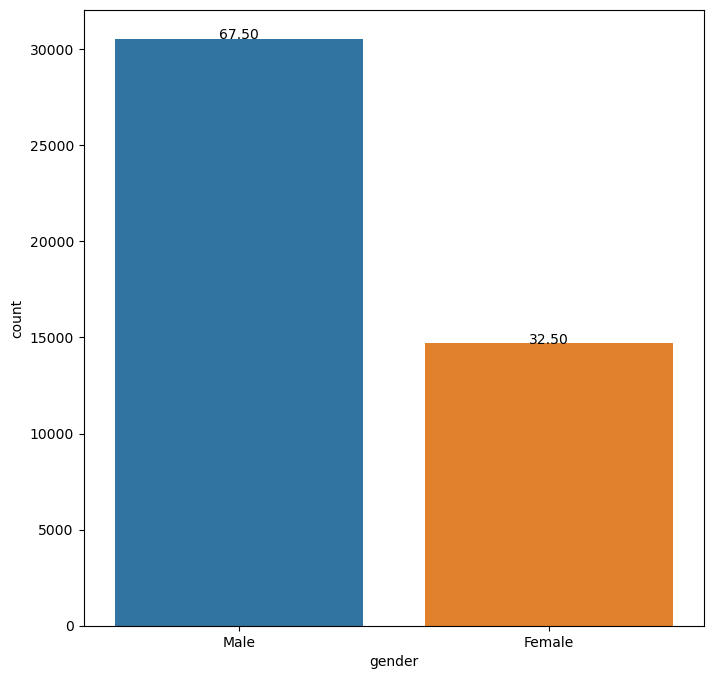

In [46]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#  Description about distribution

This distribution explains that:

Gender has 2 unique categories(male and female).
But the frequency of male(32650) is higher than the female(16192) categories.
Distribution shows that this dataset is skewed toward the male with nearly 67%.

#  Native-country

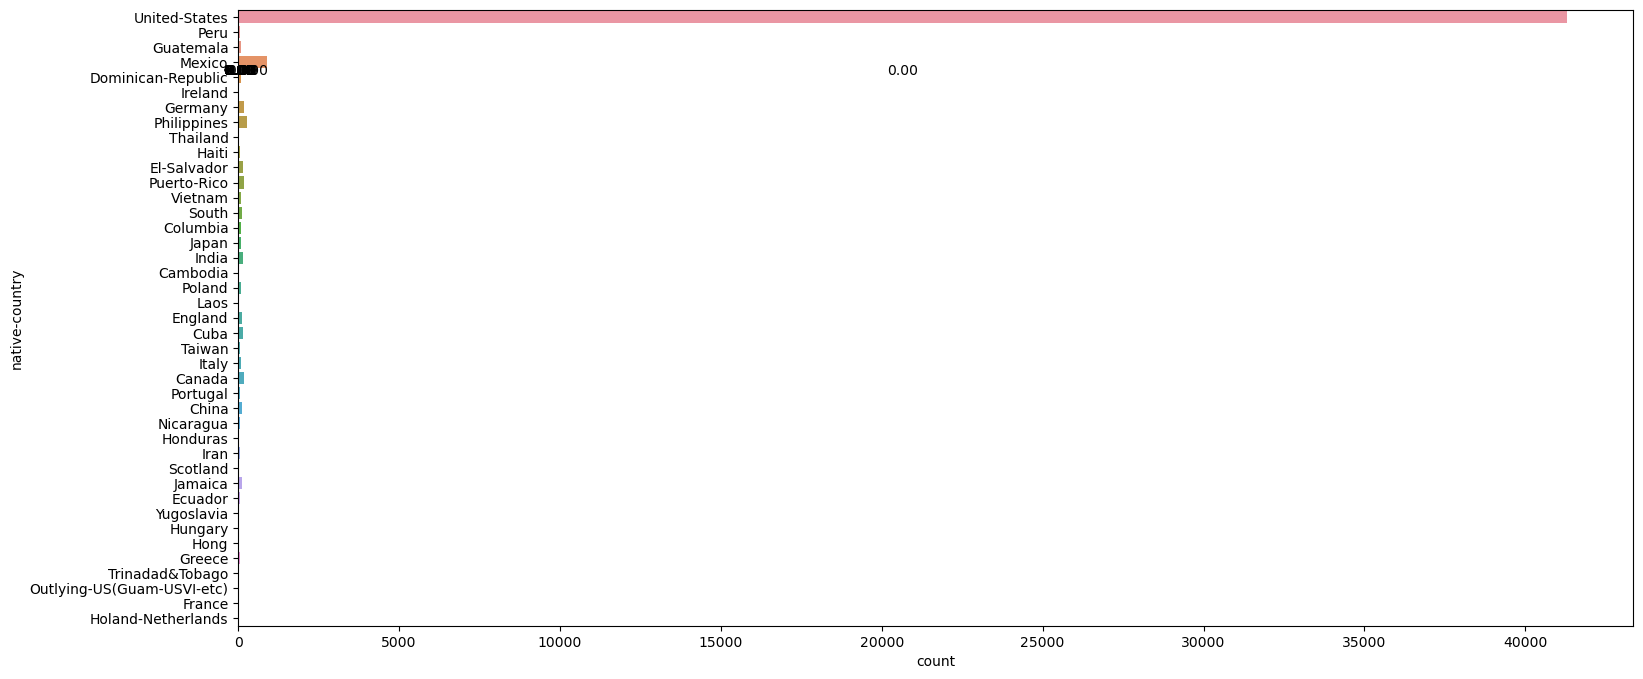

In [47]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# This distribution explains that:

This dataset is taken from the US.
As 91.5% of them have native country America and others are immigrants.

#  Income(Target variable)

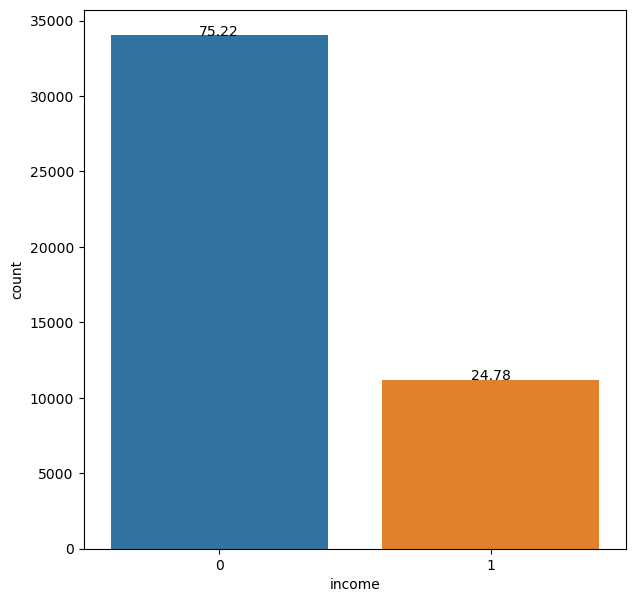

In [48]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Description about distribution

This distibution says that:

This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

# Bivariate classification

# Age

# Boxplot (Relationship with income)

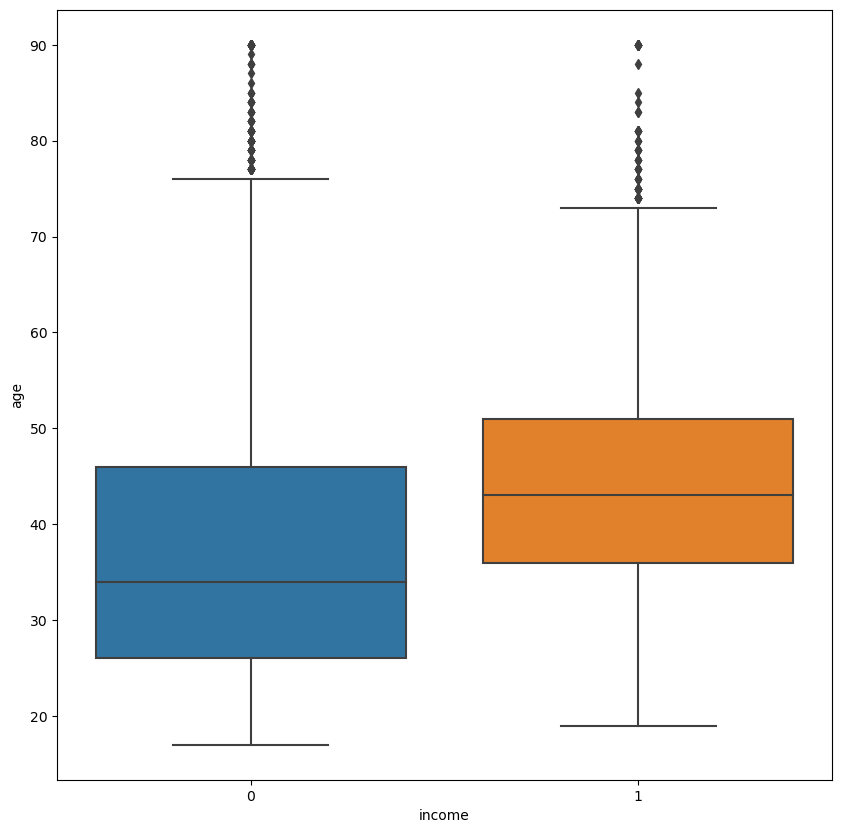

In [49]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [50]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.006067
0,0,36.749427


The mean "age" for Income group(<=50k) is 36.8 years.
And for Income group(>50k) is 44.2 years

# ii. Description about boxplot

The above bivariate boxplot shows :

Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
Interquartile range(IQR) :
For Income group(<=50k) , IQR is between [25,46] (long range)
Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

For Income group(>50k) , IQR is between [38,50] (shorter range)

# Hypothesis test (to test the relationship between income & Age )

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Example : is there any association between age and income

#Determine a null and alternative hypothesis.

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference.
The alternate hypothesis will state that there is one present.

In this example we can say that:

Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.

In [51]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']==1]['age']
income_0 = data[data['income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [52]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.6281032315229886
p value 0.00037097571465194597
we reject null hypothesis


# iv. Final conclusion

# Using statistical analysis,

We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
It means that age has some contribution to the distinguish income groups.

# Hours per week

# Boxplot (Relationship with income)